In [13]:
import keras

In [16]:
from keras.datasets import cifar10
(X_train,Y_train),(X_test,Y_test)=cifar10.load_data()

170500096/170498071 [==============================] - 31s 0us/step


In [17]:
print("Shape of X_train: %r ", X_train.shape)
print("Shape of Y_train: %r ", Y_train.shape)
print("Shape of X_test: %r ",  X_test.shape)
print("Shape of Y_test: %r ",  Y_test.shape)

Shape of X_train: %r  (50000, 32, 32, 3)
Shape of Y_train: %r  (50000, 1)
Shape of X_test: %r  (10000, 32, 32, 3)
Shape of Y_test: %r  (10000, 1)


In [23]:
import matplotlib.pyplot as plt

In [20]:
from pylab import rcParams
rcParams['figure.figsize']=(16,4)

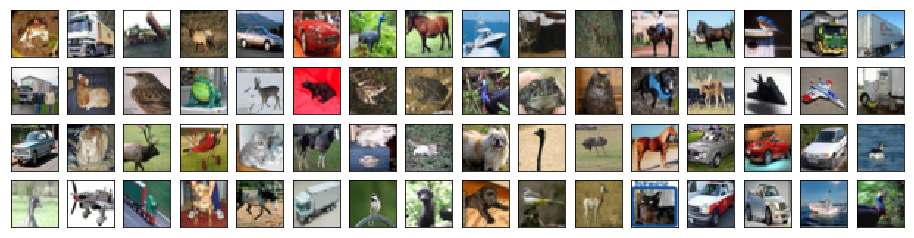

In [25]:
for i in range(64):
    plt.subplot(4,16,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train[i])
plt.show()

In [27]:
BATCH_SIZE = 32
NB_CLASSES = 10
NB_EPOCH = 25

In [29]:
X_trainX_train = X_train.astype('float32')
X_test  = X_test.astype('float32')
X_train = X_train/255
X_test  /= 255

In [34]:
from keras.utils import np_utils
Y_train_onehot = np_utils.to_categorical(Y_train, NB_CLASSES)
Y_test_onehot  = np_utils.to_categorical(Y_test, NB_CLASSES)

In [35]:
from keras.preprocessing.image import ImageDataGenerator
datagen=ImageDataGenerator(horizontal_flip=True)

datagen.fit(X_train)

Designing a Convolutional Neural Network using a Relu activation function

In [37]:
from keras.models import Sequential
from keras.layers import Convolution2D , MaxPooling2d, Flatten , Dense



In [49]:
classical_cnn = Sequential([
    Convolution2D(32, 5, 5, activation='relu', border_mode='same', input_shape=(32, 32, 3)),
    MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),

    Convolution2D(32, 5, 5, activation='relu', border_mode='same'),
    MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),

    Convolution2D(64, 5, 5, activation='relu', border_mode='same'),
    MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),

    Flatten(),
    Dense(64, activation='relu'),
    Dense(NB_CLASSES, activation='relu'),
])

C:\Users\Swetha\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (5, 5), activation="relu", input_shape=(32, 32, 3..., padding="same")`
  
C:\Users\Swetha\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (5, 5), activation="relu", padding="same")`
  """
C:\Users\Swetha\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (5, 5), activation="relu", padding="same")`
  


In [64]:
import pydot
import graphviz
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
# SVG(model_to_dot(classical_cnn).create(prog='dot', format='svg'))

In [72]:
# This doesnt seem to work. See what the error is. Not import as it is just a vizualization aspect.
# SVG(model_to_dot(classical_cnn).create(prog='dot',format='svg'))
# SVG(model_to_dot(classical_cnn).create(prog='dot', format='svg'))

In [70]:
classical_cnn.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [73]:
classical_cnn_history = classical_cnn.fit_generator(datagen.flow(X_train,Y_train_onehot,batch_size=BATCH_SIZE),samples_per_epoch=X_train.shape[0],nb_epoch=NB_EPOCH,validation_data=(X_test,Y_test_onehot))

C:\Users\Swetha\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  """Entry point for launching an IPython kernel.
C:\Users\Swetha\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., steps_per_epoch=1562, epochs=25)`
  """Entry point for launching an IPython kernel.


Epoch 1/25
1562/1562 [==============================] - 344s 220ms/step - loss: 4.8385 - acc: 0.1964 - val_loss: 4.6865 - val_acc: 0.2480
Epoch 2/25
1562/1562 [==============================] - 336s 215ms/step - loss: 4.6332 - acc: 0.2546 - val_loss: 3.6097 - val_acc: 0.1020
Epoch 3/25
1562/1562 [==============================] - 314s 201ms/step - loss: 3.3821 - acc: 0.2179 - val_loss: 3.2145 - val_acc: 0.2851
Epoch 4/25
1562/1562 [==============================] - 310s 199ms/step - loss: 3.3882 - acc: 0.2258 - val_loss: 3.5381 - val_acc: 0.1702
Epoch 5/25
1562/1562 [==============================] - 317s 203ms/step - loss: 3.4041 - acc: 0.2368 - val_loss: 3.4712 - val_acc: 0.1690
Epoch 6/25
1562/1562 [==============================] - 322s 206ms/step - loss: 3.3068 - acc: 0.2655 - val_loss: 3.2103 - val_acc: 0.3196
Epoch 7/25
1562/1562 [==============================] - 355s 227ms/step - loss: 3.1616 - acc: 0.3300 - val_loss: 3.1157 - val_acc: 0.3418
Epoch 8/25
1562/1562 [============

In [74]:
 classical_cnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_31 (Conv2D)           (None, 32, 32, 32)        2432      
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 15, 15, 32)        25632     
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 7, 7, 64)          51264     
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 3, 3, 64)          0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 576)               0         
__________